In [1]:
import cv2
from matplotlib import pyplot as plt
# 開啟圖像
image = cv2.imread("5.jpg")

In [2]:
##透過新的window開啟
##cv2.imshow('ocr',image)
##cv2.waitKey(0)

In [3]:
##透過jupyter notebook開啟圖片
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height,width,depth = im_data.shape

    figsize = width/float(dpi),height/float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])

    ax.axis('off')
    ax.imshow(im_data,cmap='gray')

    plt.show()

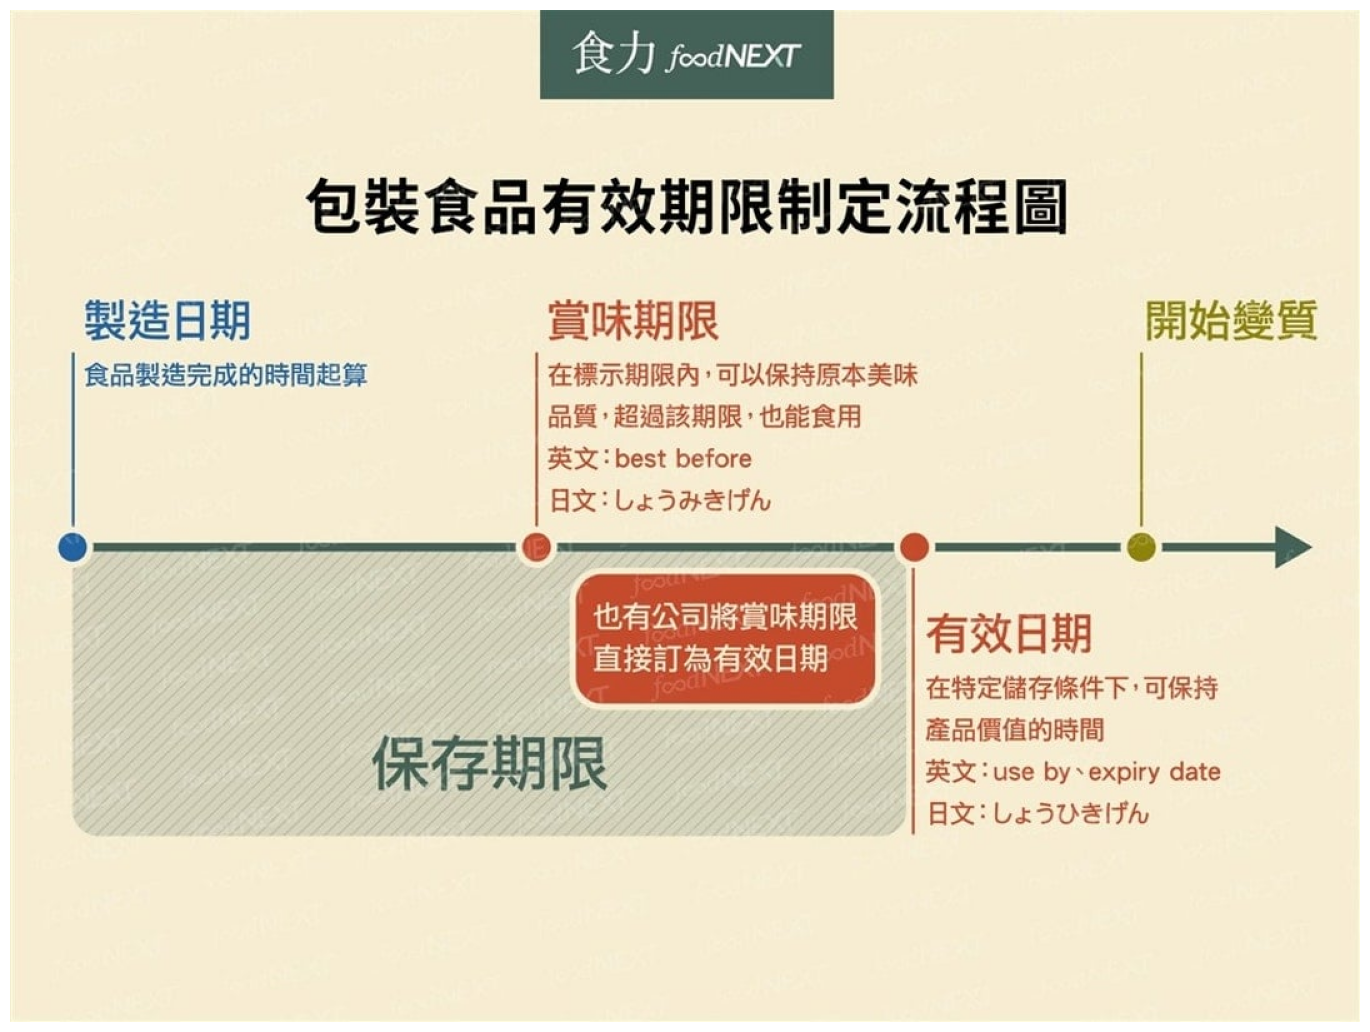

In [4]:
display('5.jpg')

In [5]:
##invert image透過顏色的顛倒進行圖像預處理
inverted_image = cv2.bitwise_not(image)
cv2.imwrite("5_invert.jpg",inverted_image)

True

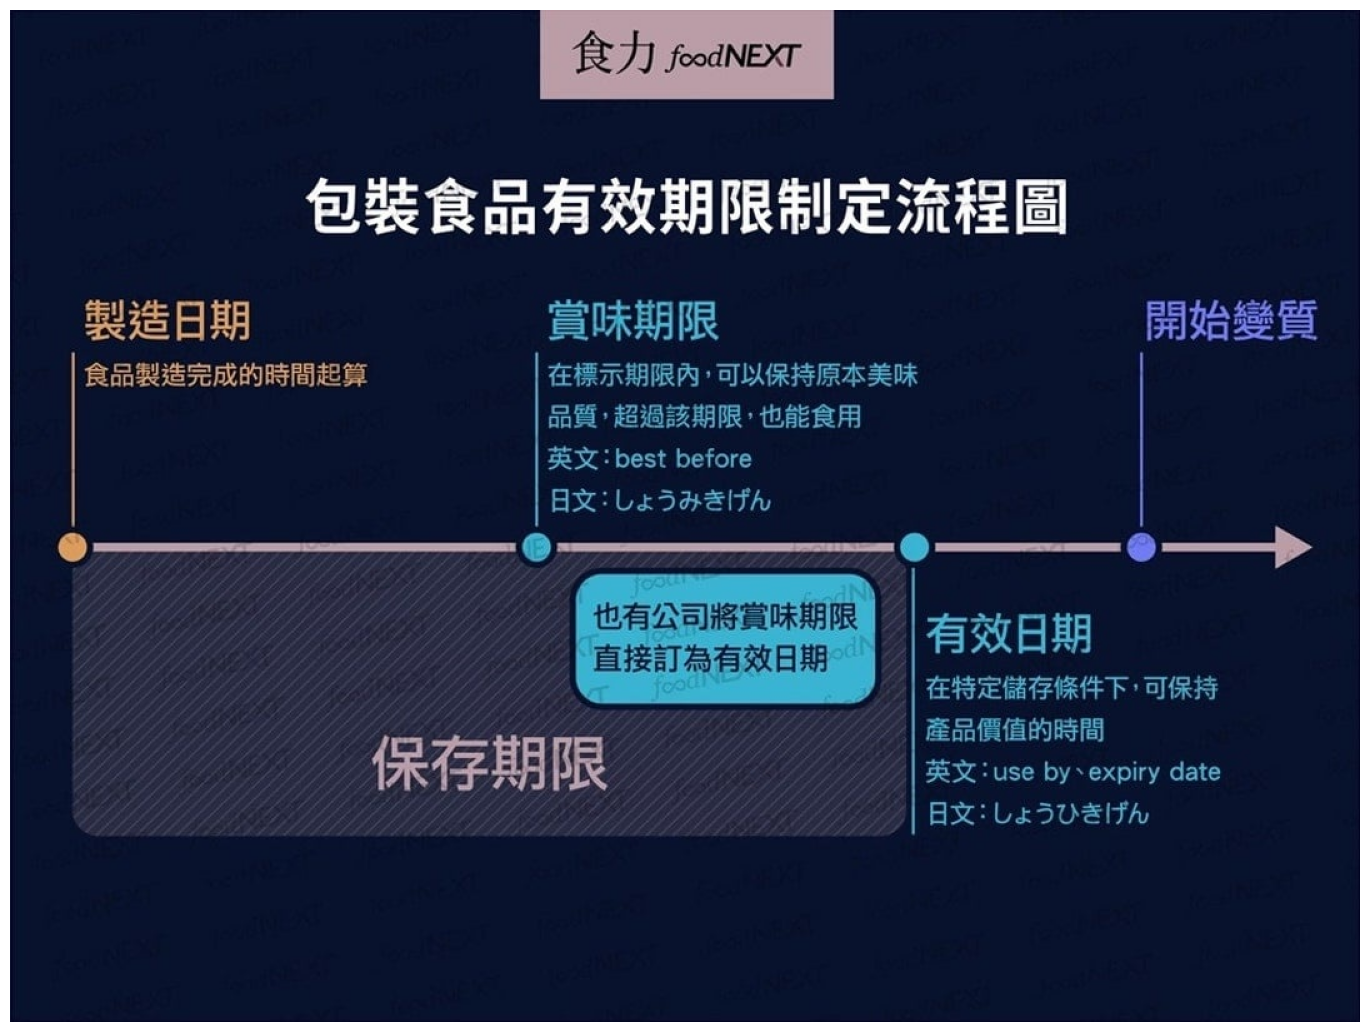

In [6]:
display("5_invert.jpg")

In [7]:
##二質化透過此方法將透過顏色轉為黑白
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imwrite("5_gray.jpg",gray_image)
##cv2.imshow("5_gray_image",gray_image)
##cv2.waitKey(0)

True

In [8]:
##將黑白對比提高
thresh,im_bw = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
cv2.imwrite("5_bw_image.jpg",im_bw)
##cv2.imshow("5_im_bw",im_bw)
##cv2.waitKey(0)

True

In [9]:
##移除圖片上的噪點
def noise_removal(image):
    import numpy as np
    kernal = np.ones((1 ,1),np.uint8)
    image = cv2.dilate(image,kernal,iterations=1)
    kernal = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernal,iterations=1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernal)
    image = cv2.medianBlur(image,3)
    return(image)

In [10]:
no_noise = noise_removal(im_bw) 
cv2.imwrite("5_no_noise.jpg",no_noise)

True

In [11]:
##cv2.imshow("5_im_bw",im_bw)
##cv2.imshow("5_no_noise",no_noise)
##cv2.waitKey(0)

In [12]:
##透過Dilation and Erosion去修正移除噪點所導致字體過粗或過細之問題
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((3,3),np.int8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return(image)

def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.int8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return(image)

In [13]:
dilate_image = thick_font(no_noise)
eroded_image = thin_font(no_noise)
cv2.imwrite("5_eroded_image.jpg",eroded_image)
cv2.imwrite("5_dilate_image.jpg",dilate_image)
##cv2.imshow("5_dilate_image",dilate_image)
##cv2.imshow("5_eroded_image",eroded_image)
##cv2.waitKey(0)

True

In [14]:
##以肉眼來看，目前im_bw的字看得最清晰

In [15]:
##由於預處理後的保存期限四字為白字，在不影響判斷的情況下轉為黑字
new_inverted_image = cv2.bitwise_not(dilate_image)
cv2.imwrite("5_new_invert.jpg",new_inverted_image)
##cv2.waitKey(0)

True

In [16]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# 使用OCR進行文字識別
text = pytesseract.image_to_string(inverted_image, lang='chi_tra')
print(text)

包裝 食品 有 效 期 限制 定 流程 圖

製造 日 期 賞味 期 限 開 始 變 質
食品 製造 完成 的 時 間 起 算 在 標示 期 限 內 , 可 以 保持 原 本 美 味

品 質 , 超 過 該 期 限 ' 也 能 食用

英文 : best before

日 文 : L43 囑 音 [Au
傅 全 全 0

也 有 公司 將 賞味 期 限 讓
直接 訂 為 有 效 日 期 有 效 日 期
在 特 定 儲存 條 件 下 , 可 保持
產品 價 值 的 時 間

保存 期 限 英文 :use by、expiry date
日 文 : L+35 疙 吝 [Au



In [17]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# 使用OCR進行文字識別
imge1=cv2.imread("5.jpg")
imge2=cv2.imread("5_invert.jpg")
imge3=cv2.imread("5_gray.jpg")
imge4=cv2.imread("5_no_noise.jpg")
imge5=cv2.imread("5_eroded_image.jpg")
imge6=cv2.imread("5_dilate_image.jpg")
imge7=cv2.imread("5_bw_image.jpg")
text = pytesseract.image_to_string(imge1, lang='chi_tra')
print(text)

包裝 食品 有 效 期 限制 定 流程 圖

製造 日 期 賞味 期 限 開 始 變 質
食品 製造 完成 的 時 間 起 算 在 標示 期 限 內 , 可 以 保持 原 本 美 味

品 質 , 超 過 該 期 限 ' 也 能 食用

英文 : best before

日 文 : L43 囑 音 [Au
傅 全 全

也 有 公司 將 賞味 期 限 讓
直接 訂 為 有 效 日 期 有 效 日 期
在 特 定 儲存 條 件 下 , 可 保持
產品 價 值 的 時 間

保存 期 限 英文 :use by、expiry date
日 文 : L+35 疙 吝 [Au



In [18]:
text = pytesseract.image_to_string(imge2, lang='chi_tra')
print(text)

包裝 食品 有 效 期 限制 定 流程 圖

製造 日 期 賞味 期 限 開 始 變 質
食品 製造 完成 的 時 間 起 算 在 標示 期 限 內 , 可 以 保持 原 本 美 味

品 質 , 超 過 該 期 限 ' 也 能 食用

英文 : best before

日 文 : L43 囑 音 [Au
愈 傅 全 0

也 有 公司 將 賞味 期 限 永
直接 訂 為 有 效 日 期 有 效 日 期
在 特 定 儲存 條 件 下 , 可 保持
產品 價 值 的 時 間

保存 期 限 英文 :use by、expiry date
日 文 : L+35 疙 吝 [Au



In [19]:
text = pytesseract.image_to_string(imge3, lang='chi_tra')
print(text)

讓

包裝 食品 有 效 期 限制 定 流程 圖

製造 日 期 賞味 期 限 開 始 變 質

品 質 , 超 過 該 期 限 ' 也 能 食用

食品 製造 完成 的 時 間 起 算 在 標示 期 限 內 , 可 以 保持 原 本 美 味
英文 :best before

日 文 : Lz3 夭 吝 [7/u
人
也 有 公司 將 賞味 期 限 并
上 「 有 效 日 期

在 特 定 儲存 條 件 下 , 可 保持
產品 價 值 的 時 間

保存 期 限 英文 :use by、expiry date

日 文 : L+35 疙 吝 [Au



In [20]:
text = pytesseract.image_to_string(imge4, lang='chi_tra')
print(text)

包裝 食品 有 效 期 限制 定 流程 圖
製造 日 期 彈 味 期 限 還 同 媽媽 生

全 記 各 志和 襄 的 主 昌 十 共 估計

s 一 和
也 有 公司 當 味 期 隊
失當 有 玫 日 基 ~ 字 日 二 。




In [21]:
text = pytesseract.image_to_string(imge5, lang='chi_tra')
print(text)

記 計 日 過

包裝 食品 有 效 期 限制 定 流程 回

保存 期 限

各 必中 由



In [22]:
text = pytesseract.image_to_string(imge6, lang='chi_tra')
print(text)

包裝 食品 有 效 期 限制 定 流程 圖
製造 日 期 賞味 期 限 加 時 同 始 好 生

全 品 科 這 笠 成 的 時 昌 舉 人

保存 期 限



In [23]:
text = pytesseract.image_to_string(imge7, lang='chi_tra')
print(text)

包裝 食品 有 效 期 限制 定 流程 圖

製造 日 期 賞味 期 限

食品 製造 完成 的 時 間 起 算 在 和 內 , 可 以 保持 怖 本 美 味 |
品 質 . 眼 ' 也 能 食用
英文 :best before
日 文 : Le: 全 入 客 財 和

產 時
保存 期 限 文 10 pr any aa

日 文 : 4 今 分 才 [所

